<div class="alert alert-block alert-info">
<b>Комментарий ревьюера:</b>

Мне понравился твой проект 👍🏻 Видно, что приложено много усилий)

Перед отправкой проекта, пожалуйста, перезапусти ядро и убедись, что весь код работает (Kernel -> Restart and Run All). Важно, чтобы нумерация ячеек была правильной (начиналась с "1" и выполнялась по порядку).

Если не хочешь ждать обучения моделей, можешь сохранить лучшие гиперпараметры в отдельной переменной и закомментировать код. Необходимо также зафиксировать random_state, чтобы результат был всегда одинаковым.

Таким образом, я смогу быстрее проверить проект, и ты успеешь к дедлайну 👋🏻
</div>

Привет, Ярослав!)
<br> Меня зовут Дуолан 👋 и я рад стать твоим проводником в мире кода и данных!
<br> Вместе мы прокачаем твой проект до самого верха! 🚀
<br> Давай общаться на «ты» и поддерживать дружескую атмосферу. Если ты согласен, конечно! 😊
<br> Пожалуйста, напиши мне ответ на каждый комментарий («исправлено», «не уверен, как это сделать» и т. д.)
<br> Оставь, пожалуйста, мои комментарии на месте – они пригодятся для последующих проверок.

Комментарии будут в <font color='green'>зеленой</font>, <font color='blue'>синей</font> или <font color='red'>красной</font> рамках:

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b> Если всё просто супер!
</div>

<div class="alert alert-block alert-warning">
<b>⚠️ Совет:</b> Если можно немного улучшить
</div>

<div class="alert alert-block alert-danger">
<b>❌ Замечание:</b> Если требуются исправления
</div>

Твой проект не может быть принят, пока есть красные комментарии.

-------------------

Пожалуйста, отмечай свои ответы и изменения таким образом:

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> ...
</div>

<div class="alert alert-block alert-info">
<b>Изменения:</b> Вот что я изменил ...
</div>

# Определение стоимости автомобилей

Сервис по продаже автомобилей с пробегом «Не бит, не крашен» разрабатывает приложение для привлечения новых клиентов. В нём можно быстро узнать рыночную стоимость своего автомобиля. В вашем распоряжении исторические данные: технические характеристики, комплектации и цены автомобилей. Вам нужно построить модель для определения стоимости. 

Заказчику важны:

- качество предсказания;
- скорость предсказания;
- время обучения.

---
### *Описание данных*

__*Для исследования получен csv-файл: autos.csv*__


Признаки:
* DateCrawled — дата скачивания анкеты из базы
* VehicleType — тип автомобильного кузова
* RegistrationYear — год регистрации автомобиля
* Gearbox — тип коробки передач
* Power — мощность (л. с.)
* Model — модель автомобиля
* Kilometer — пробег (км)
* RegistrationMonth — месяц регистрации автомобиля
* FuelType — тип топлива
* Brand — марка автомобиля
* Repaired — была машина в ремонте или нет
* DateCreated — дата создания анкеты
* NumberOfPictures — количество фотографий автомобиля
* PostalCode — почтовый индекс владельца анкеты (пользователя)
* LastSeen — дата последней активности пользователя

Целевой признак:
* Price — цена (евро)

## Подготовка данных

In [1]:
# !pip install lightgbm
# !pip install category_encoders

In [2]:
# импорт необходимых библиотек
import os.path
import pandas as pd
import numpy as np
import missingno as msno
import phik
from phik.report import plot_correlation_matrix
from phik import report
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from scipy import stats
from scipy.stats import ks_2samp
from sklearn.impute import KNNImputer
from sklearn.model_selection import (train_test_split, RandomizedSearchCV, GridSearchCV, KFold, cross_val_score)
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score, make_scorer, mean_squared_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, OrdinalEncoder, OneHotEncoder
from imblearn.under_sampling import RandomUnderSampler
from ydata_profiling import ProfileReport
import seaborn as sns
import matplotlib.pyplot as plt
from joblib import dump
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
import category_encoders as ce

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b>

Правильное решение — выделять отдельную ячейку в начале проекта под подключение библиотек и настройки. Tак код легче поддерживать 👌 Но также стоит соблюдать рекомендации PEP-8 при написании кода. У импортов есть тоже определенные правила. Это сделано для повышения читабельности и простоты работы с кодом.

https://pythonworld.ru/osnovy/pep-8-rukovodstvo-po-napisaniyu-koda-na-python.html
</div>

In [3]:
# class Preprocessing:
#     def __init__(self, df):
#         self.df = df
#
#     def camel_to_snake(self, s):
#         return ''.join(['_' + c.lower() if c.isupper() else c for c in s]).lstrip('_')
#
#     def convert_columns_to_snake_case(self):
#         self.df.columns = map(self.camel_to_snake, self.df.columns)
#         return np.array(self.df.columns)
#
#     def full_duplicates(self):
#         count_full_duplicates = self.df.duplicated().sum()
#         self.df.drop_duplicates(inplace=True)
#         print(f'Число обнаруженных и удаленных полных дубликатов: {count_full_duplicates}')
#
#     def implicit_duplicates(self):
#         ocols = self.df.select_dtypes('object').columns
#         self.df[ocols] = self.df[ocols].apply(lambda x: x.str.lower())
#         for col in self.df[ocols]:
#             print(f"{col}: {np.array(self.df[col].sort_values().unique())}", end='\n\n')
#
#     def type_changes(self):
#         fcols = self.df.select_dtypes('float').columns
#         icols = self.df.select_dtypes('integer').columns
#         self.df[fcols] = self.df[fcols].apply(pd.to_numeric, downcast='float')
#         self.df[icols] = self.df[icols].apply(pd.to_numeric, downcast='integer')
#         return self.df.info()
#
#     def pass_percentage(self):
#         return pd.DataFrame(round(self.df.isna().mean() * 100)) \
#             .rename(columns={0: 'space'}).query('space > 0') \
#             .sort_values(by='space', ascending=True) \
#             .style.background_gradient('coolwarm')

In [4]:
def camel_to_snake(s):
    return ''.join(['_' + c.lower() if c.isupper() else c for c in s]).lstrip('_')


def convert_columns_to_snake_case(data):
    data.columns = map(camel_to_snake, data.columns)
    return np.array(data.columns)


def full_duplicates(data):
    count_full_duplicates = data.duplicated().sum()
    data.drop_duplicates(inplace=True)
    print(f'Число обнаруженных и удаленных полных дубликатов: {count_full_duplicates}')


def implicit_duplicates(data):
    ocols = data.select_dtypes('object').columns
    data[ocols] = data[ocols].apply(lambda x: x.str.lower())
    for col in data[ocols]:
        print(f"{col}: {np.array(data[col].sort_values().unique())}", end='\n\n')


def type_changes(data):
    fcols = data.select_dtypes('float').columns
    icols = data.select_dtypes('integer').columns
    data[fcols] = data[fcols].apply(pd.to_numeric, downcast='float')
    data[icols] = data[icols].apply(pd.to_numeric, downcast='integer')
    return data.info()


def pass_percentage(data):
    return pd.DataFrame(round(data.isna().mean() * 100)) \
        .rename(columns={0: 'space'}).query('space > 0') \
        .sort_values(by='space', ascending=True) \
        .style.background_gradient('coolwarm')


def anomaly_research(data):
    return data.describe(percentiles=[0.0012, 0.01, .5, .99, .9988]).drop(['count', 'mean', 'std'], axis=0)


def replace_zeroes_values(data, list):
    data[list] = data[list].replace(0, np.nan)
    return data.describe(percentiles=[0.0012, 0.01, .5, .99, .9988]).drop(['count', 'mean', 'std'], axis=0)


def check_features(data, columns):
    list_0012, list_01, list_99, list_9988 = [], [], [], []
    for col in columns:
        min_val = data[col].min()
        quantile_0012 = data[col].quantile(0.0012)
        quantile_01 = data[col].quantile(0.01)
        max_val = data[col].max()
        quantile_9988 = data[col].quantile(0.9988)
        quantile_99 = data[col].quantile(0.99)
        if abs(quantile_0012) < abs(quantile_01) / 3:
            list_01.append(col)
        elif abs(min_val) < abs(quantile_0012) / 3:
            list_0012.append(col)

        if abs(quantile_99) < abs(quantile_9988) / 3:
            list_99.append(col)
        elif abs(max_val) / 3 > abs(quantile_9988):
            list_9988.append(col)
    return list_0012, list_01, list_99, list_9988


def correct_features(data, columns):
    list_0012, list_01, list_99, list_9988 = check_features(data, columns)

    for col in list_0012:
        q = data[col].quantile(0.0012)
        data = data.loc[data[col] >= q, columns]

    for col in list_01:
        q = data[col].quantile(0.01)
        data = data.loc[data[col] >= q, columns]

    for col in list_99:
        q = data[col].quantile(0.99)
        data = data.loc[data[col] <= q, columns]

    for col in list_9988:
        q = data[col].quantile(0.9988)
        data = data.loc[data[col] <= q, columns]
    return data


def recover_gearbox(model):
    if new_df.loc[model, :].sum() > 0:
        return new_df.loc[model, :].sort_values().index[-1]
    else:
        return np.nan


def recover_fuel_type(model):
    if new_df.loc[model, :].sum() > 0:
        return new_df.loc[model, :].sort_values().index[-1]
    else:
        return np.nan


def recover_vehicle_type(model):
    if new_df.loc[model, :].sum() > 0:
        if new_df.loc[model, :].sort_values()[-1] / 10 > new_df.loc[model, :].sort_values()[-2]:
            return new_df.loc[model, :].sort_values().index[-1]
        else:
            return 'unknown'
    else:
        return np.nan


def phik_table(data):
    phik_overview = data.phik_matrix(interval_cols=['price', 'registration_year', 'power', 'kilometer'])
    return phik_overview.round(2)


def phik_matrix(data):
    phik_overview = data.phik_matrix(interval_cols=['price', 'registration_year', 'power', 'kilometer'])
    mask = np.triu(np.ones_like(phik_overview, dtype=bool))

    plt.figure(figsize=(10, 8))
    sns.heatmap(phik_overview, annot=True, cmap='coolwarm', linewidths=0.1, linecolor='black', mask=mask)
    plt.title('Phik Correlation Matrix')

    return plt.show()

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b>

Хорошие помощники 👍
</div>

In [5]:
try:
    if os.path.isfile('datasets/autos.csv'):
        df = pd.read_csv('datasets/autos.csv', parse_dates=['DateCrawled', 'DateCreated', 'LastSeen'])
    else:
        df = pd.read_csv('/datasets/autos.csv', parse_dates=['DateCrawled', 'DateCreated', 'LastSeen'])
except FileNotFoundError:
    df = pd.read_csv('https://code.s3.yandex.net/datasets/autos.csv',
                     parse_dates=['DateCrawled', 'DateCreated', 'LastSeen'])

In [6]:
df.shape[0]

354369

In [7]:
df.head()

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31,0,60437,2016-04-06 10:17:21


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   DateCrawled        354369 non-null  datetime64[ns]
 1   Price              354369 non-null  int64         
 2   VehicleType        316879 non-null  object        
 3   RegistrationYear   354369 non-null  int64         
 4   Gearbox            334536 non-null  object        
 5   Power              354369 non-null  int64         
 6   Model              334664 non-null  object        
 7   Kilometer          354369 non-null  int64         
 8   RegistrationMonth  354369 non-null  int64         
 9   FuelType           321474 non-null  object        
 10  Brand              354369 non-null  object        
 11  Repaired           283215 non-null  object        
 12  DateCreated        354369 non-null  datetime64[ns]
 13  NumberOfPictures   354369 non-null  int64   

---
### *Переименование столбцов*

In [9]:
convert_columns_to_snake_case(df)

array(['date_crawled', 'price', 'vehicle_type', 'registration_year',
       'gearbox', 'power', 'model', 'kilometer', 'registration_month',
       'fuel_type', 'brand', 'repaired', 'date_created',
       'number_of_pictures', 'postal_code', 'last_seen'], dtype=object)

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b> 

Работать с такими названиями гораздо удобнее 👍🏻
</div>

---
### *Обработка дубликатов*

In [10]:
full_duplicates(df)

Число обнаруженных и удаленных полных дубликатов: 4


Поиск неявных дубликатов.

In [11]:
implicit_duplicates(df)

vehicle_type: ['bus' 'convertible' 'coupe' 'other' 'sedan' 'small' 'suv' 'wagon' nan]

gearbox: ['auto' 'manual' nan]

model: ['100' '145' '147' '156' '159' '1_reihe' '1er' '200' '2_reihe' '300c'
 '3_reihe' '3er' '4_reihe' '500' '5_reihe' '5er' '601' '6_reihe' '6er'
 '7er' '80' '850' '90' '900' '9000' '911' 'a1' 'a2' 'a3' 'a4' 'a5' 'a6'
 'a8' 'a_klasse' 'accord' 'agila' 'alhambra' 'almera' 'altea' 'amarok'
 'antara' 'arosa' 'astra' 'auris' 'avensis' 'aveo' 'aygo' 'b_klasse'
 'b_max' 'beetle' 'berlingo' 'bora' 'boxster' 'bravo' 'c1' 'c2' 'c3' 'c4'
 'c5' 'c_klasse' 'c_max' 'c_reihe' 'caddy' 'calibra' 'captiva' 'carisma'
 'carnival' 'cayenne' 'cc' 'ceed' 'charade' 'cherokee' 'citigo' 'civic'
 'cl' 'clio' 'clk' 'clubman' 'colt' 'combo' 'cooper' 'cordoba' 'corolla'
 'corsa' 'cr_reihe' 'croma' 'crossfire' 'cuore' 'cx_reihe' 'defender'
 'delta' 'discovery' 'doblo' 'ducato' 'duster' 'e_klasse' 'elefantino'
 'eos' 'escort' 'espace' 'exeo' 'fabia' 'fiesta' 'focus' 'forester'
 'forfour' 'fortwo' 

Неявные дубликаты не обнаружены.

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b>

От явных дубликатов избавились 👍
</div>

---
### *Отбор признаков*

In [12]:
df.head()

,date_crawled,price,vehicle_type,registration_year,gearbox,power,model,kilometer,registration_month,fuel_type,brand,repaired,date_created,number_of_pictures,postal_code,last_seen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31,0,60437,2016-04-06 10:17:21


Удалим явные неинформативные признаки и преобразуем столбец `date_created` к такому виду, чтобы у каждого объекта был только год публикации.

In [13]:
df = df.drop(['date_crawled', 'registration_month', 'number_of_pictures', 'postal_code', 'last_seen'], axis=1)
df['date_created'] = df['date_created'].dt.year

In [14]:
df.head()

,price,vehicle_type,registration_year,gearbox,power,model,kilometer,fuel_type,brand,repaired,date_created
0,480,NaN,1993,manual,0,golf,150000,petrol,volkswagen,NaN,2016
1,18300,coupe,2011,manual,190,NaN,125000,gasoline,audi,yes,2016
2,9800,suv,2004,auto,163,grand,125000,gasoline,jeep,NaN,2016
3,1500,small,2001,manual,75,golf,150000,petrol,volkswagen,no,2016
4,3600,small,2008,manual,69,fabia,90000,gasoline,skoda,no,2016


Отобразим уникальные значения, которые отражают год публикации объявлений.

In [15]:
df['date_created'].unique()

array([2016, 2015, 2014], dtype=int64)

In [16]:
for year in df['date_created'].unique():
    print(f"Количество объявлений опубликованных в {year} году: {df.query('date_created == @year')['price'].count()}",
          f"Медианное значение цены в {year} году: {df.query('date_created == @year')['price'].median()}", sep='\n')

Количество объявлений опубликованных в 2016 году: 354339
Медианное значение цены в 2016 году: 2700.0
Количество объявлений опубликованных в 2015 году: 25
Медианное значение цены в 2015 году: 6000.0
Количество объявлений опубликованных в 2014 году: 1
Медианное значение цены в 2014 году: 8999.0


Заметно столь значительное различие в количестве публикаций по годам, что нет никакой необходимости учитывать инфляционное смещение цены со временем. Поэтому мы можем говорить о том, что столбец `date_created` не информативен.

In [17]:
df = df.drop(['date_created'], axis=1)

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b>

Удалить неинформативные признаки - хорошее решение 👍🏻
</div>

---
### *Обработка аномальных значений*

In [18]:
anomaly_research(df)

,price,registration_year,power,kilometer
min,0.0,1000.0,0.0,5000.0
0.1%,0.0,1960.0,0.0,5000.0
1%,0.0,1980.0,0.0,5000.0
50%,2700.0,2003.0,105.0,150000.0
99%,18800.0,2018.0,300.0,150000.0
99.9%,19999.0,2018.0,520.0,150000.0
max,20000.0,9999.0,20000.0,150000.0


In [19]:
replace_zeroes_values(df, ['price', 'power'])

,price,registration_year,power,kilometer
min,1.0,1000.0,1.0,5000.0
0.1%,1.0,1960.0,18.0,5000.0
1%,100.0,1980.0,45.0,5000.0
50%,2890.0,2003.0,110.0,150000.0
99%,18850.0,2018.0,306.0,150000.0
99.9%,19999.0,2018.0,603.0,150000.0
max,20000.0,9999.0,20000.0,150000.0


In [20]:
df = df.query('2017 > registration_year >= 1960')
df[['price', 'power']] = correct_features(df, ['price', 'power'])
anomaly_research(df)

,price,registration_year,power,kilometer
min,150.0,1960.0,18.0,5000.0
0.1%,150.0,1965.0,26.0,5000.0
1%,200.0,1980.0,45.0,5000.0
50%,3200.0,2003.0,113.0,150000.0
99%,18900.0,2016.0,300.0,150000.0
99.9%,19999.0,2016.0,394.0,150000.0
max,20000.0,2016.0,515.0,150000.0


In [21]:
df.shape[0]

339413

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b>

С аномальными значениями успешно справились 👍
</div>

---
### *Обработка пропусков*

In [22]:
pass_percentage(df)

,space
gearbox,5.000000
model,5.000000
vehicle_type,7.000000
fuel_type,8.000000
price,13.000000
power,13.000000
repaired,19.000000


Восстановить значения в столбце model достоверно не представляется возможным, поэтому предпочтительно будет удалить строки с пропущенными значениями в данном столбце.

In [23]:
df = df.dropna(subset=['model'])

Проверим, как менялось распределение использования автоматической коробки передач по годам.

In [24]:
for year in df['registration_year'].unique():
    print(f"Соотношение для {year} года: {df.query('registration_year == @year')['gearbox'].value_counts()}")

Соотношение для 1993 года: manual    2586
auto       528
Name: gearbox, dtype: int64
Соотношение для 2004 года: manual    14079
auto       4331
Name: gearbox, dtype: int64
Соотношение для 2001 года: manual    15199
auto       3532
Name: gearbox, dtype: int64
Соотношение для 2008 года: manual    10628
auto       3943
Name: gearbox, dtype: int64
Соотношение для 1995 года: manual    6781
auto      1083
Name: gearbox, dtype: int64
Соотношение для 1980 года: manual    176
auto       85
Name: gearbox, dtype: int64
Соотношение для 2014 года: manual    2034
auto       396
Name: gearbox, dtype: int64
Соотношение для 1998 года: manual    13962
auto       2327
Name: gearbox, dtype: int64
Соотношение для 2005 года: manual    14833
auto       4701
Name: gearbox, dtype: int64
Соотношение для 2011 года: manual    7291
auto      2268
Name: gearbox, dtype: int64
Соотношение для 2016 года: manual    6341
auto       856
Name: gearbox, dtype: int64
Соотношение для 2007 года: manual    11875
auto       428

На основе данных не прослеживается глобального тренда увеличения использования автоматической коробки передач с течением времени.
На основании этого восстановим пропущенные значения по моде(наиболее распространенной версии коробки передач для каждой модели).

In [25]:
new_df = pd.crosstab(df['model'], df['gearbox'])
df.loc[df['gearbox'].isna(), 'gearbox'] = df.loc[df['gearbox'].isna(), 'model'].apply(recover_gearbox)

Аналогично восстановим данные для типа топлива.

In [26]:
new_df = pd.crosstab(df['model'], df['fuel_type'])
df.loc[df['fuel_type'].isna(), 'fuel_type'] = df.loc[df['fuel_type'].isna(), 'model'].apply(recover_fuel_type)

Пропуски, связанные с типом автомобиля будем восстанавливать по преобладающему типу лишь тогда, когда это преобладание значительно велико 10x, в противном случае установим заглушку - unknown(неизвестно).

In [27]:
new_df = pd.crosstab(df['model'], df['vehicle_type'])
df.loc[df['vehicle_type'].isna(), 'vehicle_type'] = df.loc[df['vehicle_type'].isna(), 'model'].apply(
    recover_vehicle_type)

In [28]:
# df[['gearbox', 'fuel_type', 'vehicle_type']] = df[['gearbox', 'fuel_type', 'vehicle_type']].fillna(value='unknown')

Так как достоверно восстановить пропуски в столбце `repaired` не представляется возможным, заполним отсутствующие значения значением `unknown`.

In [29]:
df['repaired'] = df['repaired'].fillna(value='unknown')

In [30]:
df.query('power.isna()')

,price,vehicle_type,registration_year,gearbox,power,model,kilometer,fuel_type,brand,repaired
0,NaN,unknown,1993,manual,NaN,golf,150000,petrol,volkswagen,unknown
7,NaN,sedan,1980,manual,NaN,other,40000,petrol,volkswagen,no
32,NaN,sedan,1994,manual,NaN,golf,150000,petrol,volkswagen,no
37,NaN,unknown,2016,manual,NaN,kangoo,150000,gasoline,renault,no
40,NaN,small,1990,manual,NaN,corsa,150000,petrol,opel,unknown
...,...,...,...,...,...,...,...,...,...,...
354336,NaN,unknown,2005,auto,NaN,outlander,150000,petrol,mitsubishi,unknown
354346,NaN,unknown,2005,auto,NaN,c_klasse,150000,petrol,mercedes_benz,unknown
354360,NaN,wagon,2005,manual,NaN,3er,150000,gasoline,bmw,no
354363,NaN,bus,2000,manual,NaN,zafira,150000,petrol,opel,no


In [31]:
df = df.dropna(subset=['price'])

In [32]:
df.shape[0]

283190

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b>

Пропуски успешно обработаны 👍 Модели теперь не будут капризничать)
</div>

---
### *Создание агрегированных признаков*

In [33]:
df['kilometer'].unique()

array([125000, 150000,  90000,  30000,  70000, 100000,  60000,   5000,
        20000,  80000,  50000,  40000,  10000], dtype=int64)

Так как разнообразие количества уникальных значений в столбце `kilometer` незначительное, мы можем преобразовать данный признак в категориальный, а далее применить метод OE для преобразования с сохранением зависимости от размерности исходных данных.

In [34]:
# Преобразование столбца в категориальный тип данных
df['kilometer'] = df['kilometer'].astype('category')

# Создание экземпляра OrdinalEncoder
encoder = OrdinalEncoder()

# Применение OrdinalEncoder к столбцу 'километраж'
df['kilometer'] = encoder.fit_transform(df[['kilometer']])

Исследуем взаимосвязь самого сильного по влиянию независимого признака `reg_year` на целевой признак.

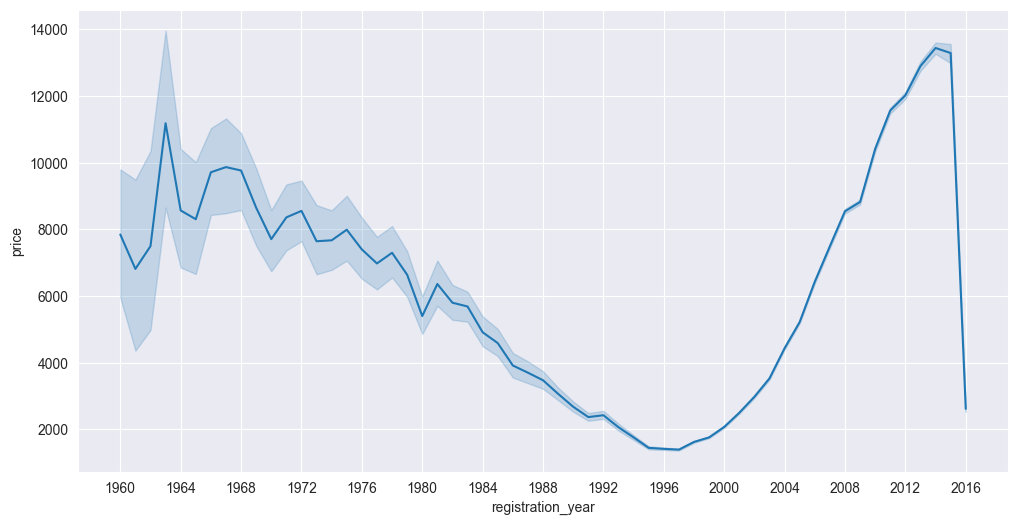

In [35]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, y='price', x='registration_year')
ax = plt.gca()
ax.xaxis.set_major_locator(plt.MaxNLocator(nbins=20))

plt.show()

Создадим агрегированный признак, который опирается при создании на мощность двигателя автомобиля.

In [36]:
df.loc[df['power'] >= 200, 'class_type'] = 'high'
df.loc[(100 <= df['power']) & (df['power'] < 200), 'class_type'] = 'medium'
df.loc[(51 <= df['power']) & (df['power'] < 100), 'class_type'] = 'small'
df.loc[df['power'] <= 50, 'class_type'] = 'micro'

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b> 👍
</div>

---
### *Изменение типов данных*

In [37]:
df['price'] = df['price'].astype(int)
df['power'] = df['power'].astype(int)
type_changes(df)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 283190 entries, 2 to 354368
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   price              283190 non-null  int16  
 1   vehicle_type       283190 non-null  object 
 2   registration_year  283190 non-null  int16  
 3   gearbox            283190 non-null  object 
 4   power              283190 non-null  int16  
 5   model              283190 non-null  object 
 6   kilometer          283190 non-null  float32
 7   fuel_type          283190 non-null  object 
 8   brand              283190 non-null  object 
 9   repaired           283190 non-null  object 
 10  class_type         283190 non-null  object 
dtypes: float32(1), int16(3), object(7)
memory usage: 20.0+ MB


<div class="alert alert-block alert-success">
<b>✔️ Успех:</b> 👍
</div>

---
### *Оценка зависимости признаков и проверка на мультиколлинеарность*

In [38]:
# profile = ProfileReport(df, title="Pandas Profiling Report")
# profile

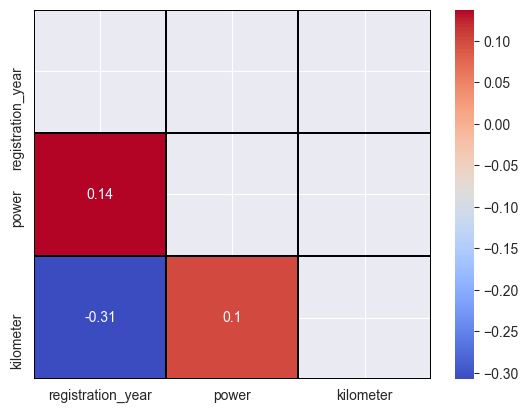

In [39]:
matrix = np.triu(df.drop('price', axis=1).corr())
sns.heatmap(df.drop('price', axis=1).corr(), annot=True, mask=matrix, cmap='coolwarm', linewidths=0.1,
            linecolor='black');

In [40]:
phik_table(df)

,price,vehicle_type,registration_year,gearbox,power,model,kilometer,fuel_type,brand,repaired,class_type
price,1.00,0.27,0.67,0.32,0.52,0.58,0.41,0.26,0.34,0.32,0.44
vehicle_type,0.27,1.00,0.25,0.21,0.48,0.91,0.15,0.33,0.60,0.28,0.55
registration_year,0.67,0.25,1.00,0.12,0.27,0.64,0.51,0.26,0.32,0.20,0.25
gearbox,0.32,0.21,0.12,1.00,0.58,0.65,0.03,0.15,0.50,0.02,0.55
power,0.52,0.48,0.27,0.58,1.00,0.80,0.11,0.25,0.54,0.11,0.84
model,0.58,0.91,0.64,0.65,0.80,1.00,0.42,0.56,1.00,0.22,0.84
kilometer,0.41,0.15,0.51,0.03,0.11,0.42,1.00,0.13,0.24,0.15,0.12
fuel_type,0.26,0.33,0.26,0.15,0.25,0.56,0.13,1.00,0.32,0.06,0.25
brand,0.34,0.60,0.32,0.50,0.54,1.00,0.24,0.32,1.00,0.14,0.59
repaired,0.32,0.28,0.20,0.02,0.11,0.22,0.15,0.06,0.14,1.00,0.07


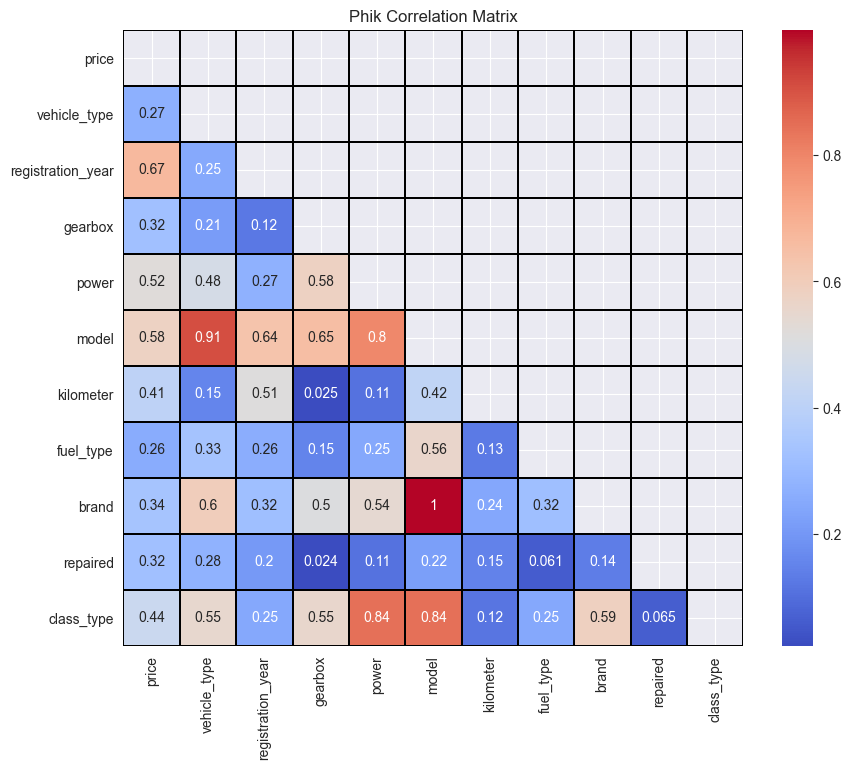

In [41]:
phik_matrix(df)

In [42]:
# df['model'] = df[['brand', 'model']].agg(' '.join , axis= 1)

In [43]:
# df = df.drop(columns=['brand'])

In [44]:
df.reset_index(inplace=True, drop=True)
type_changes(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283190 entries, 0 to 283189
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   price              283190 non-null  int16  
 1   vehicle_type       283190 non-null  object 
 2   registration_year  283190 non-null  int16  
 3   gearbox            283190 non-null  object 
 4   power              283190 non-null  int16  
 5   model              283190 non-null  object 
 6   kilometer          283190 non-null  float32
 7   fuel_type          283190 non-null  object 
 8   brand              283190 non-null  object 
 9   repaired           283190 non-null  object 
 10  class_type         283190 non-null  object 
dtypes: float32(1), int16(3), object(7)
memory usage: 17.8+ MB


<div class="alert alert-block alert-success">
<b>✔️ Успех:</b>

Данные успешно обработаны 👍
</div>

## Обучение моделей

In [45]:
features = df.drop('price', axis=1)
target = df['price']
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.20, random_state=42)

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b> 

Данные поделены верно, пропорции выбраны адекватные 👍
</div>

In [46]:
obj_columns = list(features_train.select_dtypes('object').columns)

In [47]:
# scaler = RobustScaler()
# scaler = scaler.fit(features_train[['registration_year', 'power']])
# features_train[['registration_year', 'power']] = scaler.transform(features_train[['registration_year', 'power']])
# features_test[['registration_year', 'power']] = scaler.transform(features_test[['registration_year', 'power']])

In [48]:
enc = ce.TargetEncoder(cols=obj_columns, min_samples_leaf=20, smoothing=10)
enc.fit(features_train, target_train)
features_train_forest = enc.transform(features_train)
features_test_forest = enc.transform(features_test)

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b>

Для моделей, основанных на деревьях решений, порядковое кодирование отлично подойдет 👍
</div>

In [49]:
# encoder_ohe = OneHotEncoder(drop='first', handle_unknown='error', sparse=False)
# encoder_ohe.fit(features_train[obj_columns])
# pd.options.mode.chained_assignment = None
# features_train[encoder_ohe.get_feature_names_out()] = encoder_ohe.transform(features_train[obj_columns])
# features_train = features_train.drop(obj_columns, axis=1)

In [50]:
# %%time
# linear_model = cross_val_score(LinearRegression(), features_train, target_train, cv=5, n_jobs=-1, scoring='neg_root_mean_squared_error')
# -linear_model.mean()

Подбор наилучших гиперпараметров для модели случайного леса.

In [51]:
# model = RandomForestRegressor()
# params = {
#     'n_estimators': [100, 200],
#     'min_samples_leaf': list(range(1, 8)),
#     'min_samples_split': list(range(2, 8)),
#     'max_depth': list(range(4, 21, 2)),
#     'random_state': [42]
# }
# forest_model = RandomizedSearchCV(model, param_distributions=params, random_state=42, cv=5, n_jobs=-1,
#                                   scoring='neg_root_mean_squared_error').fit(features_train_forest, target_train)
# -forest_model.best_score_

In [52]:
best_params_forest = {'random_state': 42,
                      'n_estimators': 200,
                      'min_samples_split': 3,
                      'min_samples_leaf': 2,
                      'max_depth': 18}
forest_model = cross_val_score(RandomForestRegressor(**best_params_forest), features_train_forest, target_train, cv=5,
                               n_jobs=-1, scoring='neg_root_mean_squared_error')
res_forest = -forest_model.mean()

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b> 

Модель обучена корректно 👍
</div>

Подбор наилучших гиперпараметров для Catboost.

In [53]:
# model = CatBoostRegressor(cat_features=obj_columns)
# params = {
#     'n_estimators': [500],
#     'learning_rate': list(np.arange(0.1, 0.5, 0.01)),
#     'max_depth': [7, 8, 9, 11],
#     'min_child_samples': [7, 8, 9],
#     'num_leaves': [31, 62, 124],
#     'random_state': [42]
# }
#
# catboost_model = RandomizedSearchCV(model, param_distributions=params, random_state=42, cv=5, n_jobs=-1,
#                                     scoring='neg_root_mean_squared_error').fit(features_train, target_train)
# -catboost_model.best_score_

In [54]:
cat_b_best_p = {'random_state': 42,
                'num_leaves': 31,
                'n_estimators': 500,
                'min_child_samples': 9,
                'max_depth': 8,
                'learning_rate': 0.4}
cat_model = cross_val_score(CatBoostRegressor(cat_features=obj_columns), features_train, target_train, cv=5, n_jobs=-1,
                            scoring='neg_root_mean_squared_error')
res_cat = -cat_model.mean()

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b> 

Модель обучена корректно 👍
</div>

In [70]:
features_train_LGBM = features_train.copy()
features_test_LGBM = features_test.copy()
features_train_LGBM[obj_columns] = features_train_LGBM[obj_columns].astype('category')
features_test_LGBM[obj_columns] = features_test_LGBM[obj_columns].astype('category')

In [56]:
# model = LGBMRegressor()
# params = {
#     'n_estimators': [500],
#     'learning_rate': list(np.arange(0.1, 0.5, 0.01)),
#     'max_depth': list(range(19, 21, 1)),
#     'min_child_samples': [5, 6],
#     'num_leaves': [124],
#     'random_state': [42]
# }
#
# LGBM_model = RandomizedSearchCV(model, param_distributions=params, random_state=42, cv=5, n_jobs=-1,
#                                 scoring='neg_root_mean_squared_error').fit(features_train_LGMBM, target_train)
# -LGBM_model.best_score_

In [71]:
LGBM_model_best_p = {'random_state': 42,
                     'num_leaves': 124,
                     'n_estimators': 500,
                     'min_child_samples': 6,
                     'max_depth': 19,
                     'learning_rate': 0.17}

LGBM_model = cross_val_score(LGBMRegressor(**LGBM_model_best_p), features_train_LGBM, target_train, cv=5, n_jobs=-1,
                             scoring='neg_root_mean_squared_error')
res_lgbm = -LGBM_model.mean()

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b> 

Модель обучена корректно 👍
</div>

---
### *Оценка времени обучения выбранных моделей с подобранными наилучшими гиперпараметрами*

Оценим скорость обучения для каждой из выбранных моделей с помощью магической команды %%time.
Время обучения для модели случайного леса на подобранных наилучших параметрах.

In [58]:
%%time
forest_model = RandomForestRegressor(**best_params_forest).fit(features_train_forest, target_train)

CPU times: total: 1min 7s
Wall time: 1min 6s


Оценка времени обучения для модели СatBoost на подобранных наилучших параметрах.

In [59]:
%%time
cat_model = CatBoostRegressor(**cat_b_best_p, cat_features=obj_columns).fit(features_train, target_train)

0:	learn: 3418.0473750	total: 244ms	remaining: 2m 1s
1:	learn: 2701.1056820	total: 370ms	remaining: 1m 32s
2:	learn: 2325.6288293	total: 490ms	remaining: 1m 21s
3:	learn: 2112.9871700	total: 588ms	remaining: 1m 12s
4:	learn: 1991.9766775	total: 685ms	remaining: 1m 7s
5:	learn: 1929.5275810	total: 788ms	remaining: 1m 4s
6:	learn: 1867.1863891	total: 922ms	remaining: 1m 4s
7:	learn: 1839.5154902	total: 1.01s	remaining: 1m 1s
8:	learn: 1804.4768735	total: 1.09s	remaining: 59.5s
9:	learn: 1783.0963348	total: 1.16s	remaining: 57s
10:	learn: 1767.3801826	total: 1.25s	remaining: 55.5s
11:	learn: 1753.5509437	total: 1.39s	remaining: 56.5s
12:	learn: 1743.8245854	total: 1.48s	remaining: 55.3s
13:	learn: 1736.1682272	total: 1.57s	remaining: 54.7s
14:	learn: 1728.4492383	total: 1.65s	remaining: 53.4s
15:	learn: 1723.1544920	total: 1.75s	remaining: 52.9s
16:	learn: 1711.4811031	total: 1.87s	remaining: 53.1s
17:	learn: 1702.4190843	total: 1.95s	remaining: 52.3s
18:	learn: 1694.9377396	total: 2.08s	

Оценка времени обучения для модели LGBMRegressor на подобранных наилучших параметрах.

In [72]:
%%time
LGBM_model = LGBMRegressor(**LGBM_model_best_p).fit(features_train_LGBM, target_train)

CPU times: total: 46.2 s
Wall time: 3.38 s


## Анализ моделей

---
### *Оценка времени предсказания выбранных моделей*

In [75]:
%%timeit
forest_model.predict(features_train_forest)

7.29 s ± 77.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [86]:
%%timeit
cat_model.predict(features_train)

507 ms ± 13.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [85]:
%%timeit
LGBM_model.predict(features_train_LGBM)

854 ms ± 83.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Иногда на этом этапе, возможно из-за timeit, не происходило присвоение переменным и дальше код не исполнялся, по причине не определенности переменных, поэтому присвоение дублируется.

---
### *Итоговая таблица сравнения моделей для решения поставленной задачи*

In [87]:
res_table = pd.DataFrame({'fit_time': ['70 s', '50 s', '3.45 s'], 'predict_time': ['7.3 s', '550 ms', '900 ms'],
                          'rmse': [round(res_forest), round(res_cat), round(res_lgbm)]},
                         index=['RandomForestRegressor', 'CatBoostRegressor', 'LGBMRegressor'])
res_table

,fit_time,predict_time,rmse
RandomForestRegressor,70 s,7.3 s,1513
CatBoostRegressor,50 s,550 ms,1549
LGBMRegressor,3.45 s,900 ms,1475


---
### *Оценка качества предсказания выбранной по критериям наилучшей модели на тестовой выборке по метрике RMSE*

In [82]:
#LGBMRegressor
predict_LGBM = LGBM_model.predict(features_test_LGBM)
res_lgbm_test = mean_squared_error(target_test, predict_LGBM, squared=False)
res_lgbm_test

1466.4232576982993

Проверка модели на адекватность - сравнение с dummy моделью.

In [69]:
predict_dummy = [target_test.mean()] * target_test.shape[0]
res_dummy = mean_squared_error(target_test, predict_dummy, squared=False)
res_dummy

4584.043834102201

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b>

Молодец, что для сравнения моделей заносишь их в общий датафрейм 👍
</div>

<div class="alert alert-block alert-danger">
<b>❌ Замечание:</b>
    
Анализ моделей не должен включать тестовую выборку. Тестовая выборка используется в самом конце - в финальном тестировании лучшей модели. Выбирать лучшую модель, основываясь на результатах на тестовой выборке кажется неверным, так как это может привести к переобучению.

Если валидационной выборки нет, то анализ моделей должен выглядеть так:

1. RMSE вычисляется с помощью кросс-валидации на тренировочной выборке (grid.best_score_ или cross_val_score)
2. Время обучения = время model.fit(X_train, y_train)
3. Время предсказания = время model.predict(X_train)
</div>

<div class="alert alert-block alert-success">
<b>V2 ✔️ Успешно исправлено</b>
</div>

<div class="alert alert-block alert-info">
<b>Комментарий ревьюера:</b>

Либо можешь разделить данные на три выборки и для анализа моделей использовать валидационную выборку:
    
1. RMSE вычисляется на валидационной выборке
2. Время обучения = время model.fit(X_train, y_train)
3. Время предсказания = время model.predict(X_valid)
</div>

## Тестирование лучшей модели

<div class="alert alert-block alert-danger">
<b>❌ Замечание:</b>

После анализа моделей нужно порекомендовать заказчику **одну** модель на основе его критериев и провести на ней финальное тестирование.
    
Лучше в обучении и анализе не использовать тестовую выборку. Выбирать лучшую модель, основываясь на результатах на тестовой выборке кажется неверным, так как это может привести к переобучению.
</div>

<div class="alert alert-block alert-success">
<b>V2 ✔️ Успешно исправлено</b>
</div>

<div class="alert alert-block alert-info">
<b>Комментарий ревьюера:</b>

Для того, чтобы все было понятно, напишу конкретный план (структуру) обучения и анализа моделей:

1. Обучение моделей. При обучении необходимо рассмотреть хотя бы одну простую модель и один метод бустинга. Подбор гиперпараметров должен быть проведен как минимум для одной модели. Существует два варианта:

    - Без использования валидационной выборки. В этом случае гиперпараметры следует подбирать с помощью кросс-валидации (GridSearchCV, RandomizedSearchCV) или вручную (cross_val_score).
    - С использованием валидационной выборки. В этом случае можно не использовать кросс-валидацию и подбирать гиперпараметры вручную.

2. Анализ моделей. После нахождения наилучших гиперпараметров необходимо измерить время обучения, время предсказания и RMSE. Существует два варианта:

    - Без использования валидационной выборки. RMSE следует рассчитать на кросс-валидации. Время обучения можно рассчитать как время выполнения метода model.fit(X_train), а время предсказания - как время выполнения метода model.predict(X_train).
    - С использованием валидационной выборки. RMSE следует рассчитать на валидационной выборке. Время обучения можно рассчитать как время выполнения метода model.fit(X_train), а время предсказания - как время выполнения метода model.predict(X_valid).

После этого необходимо сделать выводы по анализу моделей (результаты можно занести в общую таблицу) и посоветовать заказчику наиболее подходящую модель на основе его критериев.

3. Тестирование. Необходимо рассчитать финальную метрику лучшей модели на тестовой выборке (при этом тестовая выборка не должна использоваться на предыдущих этапах!). RMSE должно быть не больше 2500. Если метрика не удовлетворяет требованиям, можно попробовать внести коррективы в модель (на этапе обучения, а не на тестовой выборке!).

</div>

---
## Общий вывод по исследованию

<div style="border:solid orange 2px; padding: 5px">

<div class="alert alert-info"> <b>При проведении исследования (на основе полученных данных) выполнено:</b></div>

- Данные очищены от дубликатов.
- Произведена оптимизация формата размерности количественных данных.
- С помощью двух функций обнаружены и устранены выбросы.
- Проверка на отсутствие мультиколлинеарности независимых признаков числового типа.
- Данные подготовлены к дальнейшему использованию при построении модели.
- Подобраны оптимальные гиперпараметры на тренировочной выборке с использованием кросс-валидации. Для более тонкого и точного выбора модели был использован RandomizedSearchCV.
- Лучшее значение времени обучения показал LGBMRegressor.
- Лучшее значение времени, затраченного на скорость предсказания показал CatBoostRegressor.
- Лучший показатель RMSE на тестовой выборке показал LGBMRegressor.
- Итоговое предпочтение отдается LGBMRegressor, который превзошел другие модели в 2/3 категориях.
- Произведена проверка модели на адекватность.
- В работе были протестированы два подхода к заполнению пропущенных значений. Выбран наилучший подход после проведения кросс-валидационных тестов на тренировочной выборке.
- Рассмотрено применение различных типов кодирования категориальных признаков. Проведены кросс-валидационные тесты на тренировочной выборке. Выбран оптимальный вариант кодирования для каждой из моделей.
- Признанная наилучшей модель (LGBM) протестирована на тестовой выборке, показав результат на метрике RMSE(меньше - лучше) - 1466.
- Модель успешно прошла проверку на адекватность.

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b>

Вывод соответствует исследованию 👍
</div>

# <font color='orange'>Общее впечатление</font>
* Этот проект выполнен очень хорошо
* Видно, что приложено много усилий
* Молодец, что структурируешь ноутбук, приятно проверять такие работы
* У тебя чистый и лаконичный код
* Мне было интересно читать твои промежуточные выводы
* Твой уровень подачи материала находится на высоком уровне
* Исправь, пожалуйста, мои замечания. Затем отправляй на повторную проверку
* Жду новую версию проекта 👋

# <font color='orange'>2. Общее впечатление</font>
* Спасибо за быстрое внесение правок
* Теперь проект выглядит лучше )
* Критических замечаний нет
* Молодец, отличная работа!
* Надеюсь, ревью было полезным
* Удачи в дальнейшем обучении 👋

# <font color='orange'>Рекомендации 🔥</font>
* Доступное объяснение про работу градиентного бустинга <a href='https://www.youtube.com/watch?v=ZNJ3lKyI-EY&t=995s'>ссылка</a>
* После просмотра видео можешь почитать статью про ансамбли и бустинги <a href='https://habr.com/ru/company/ods/blog/645887/'>ссылка</a>
* Статья на Хабре представляет краткое введение в алгоритмы бустинга и описывает их принципы работы <a href='https://habr.com/ru/company/ods/blog/327250/'>ссылка</a>
* Подбор гиперпараметров для CatBoost <a href='https://habr.com/ru/company/otus/blog/527554/'>ссылка</a>
* Подбор гиперпараметров для LightGBM <a href='https://programmersought.com/article/40776531516/'>ссылка</a>
* Разумные способы кодирования категориальных данных для машинного обучения <a href='https://machinelearningmastery.ru/smarter-ways-to-encode-categorical-data-for-machine-learning-part-1-of-3-6dca2f71b159/'>ссылка</a>
* Статья про "непонятную" метрику ROC-AUC <a href='https://dyakonov.org/2017/07/28/auc-roc-площадь-под-кривой-ошибок/'>ссылка</a>
* Хочешь подтянуть математику для DS?) <a href='https://academy.stepik.org/math-for-data-science'>ссылка</a>
* Также есть курс по математике от ЯП <a href='https://practicum.yandex.ru/math-for-da-ds/'>ссылка</a>
* В нашем деле нужно быть всегда в курсе всех новинок, новостей и тд, вот тут публикуют новости в области DS <a href='https://www.infoq.com/data-analysis/news/'>ссылка</a>
* Всем аналитикам данных рекомендую книгу Даниела Канемана "Думай медленно, решай быстро"